### Simulation Assignment
#### EE4140: Digital Communication Systems
#### Ayush Mukund Jamdar EE20B018

This notebook contains my solution to the simulation assignment. The following sections describe each question. 

#### Q1
Raised Cosine pulse shaped transmission. 
Impulse response of the pulse shaping filter $g(t)$ is given.

$$g(nT_s)=g(n)$$
$$T_s = T/J$$

The filter is truncated to $T\cdot L$ on both sides.


In [36]:
import numpy as np
import matplotlib.pyplot as plt

N = 16

def generate_random(N):
    I_data = []
    for i in range(N):
        I_data.append(np.random.choice([-1, 1]))
    return I_data

I_data = generate_random(N)
# I_data = np.ones(16)

J = 4
L = 2
beta = 0

# J-1 zeroes to be interleaved between each sample
def interleave_zeros(I_data, J, N):
    I_k = []
    for i in range(N):
        I_k.append([I_data[i]] + [0]*(J-1))

    I_k = np.array(I_k).flatten()
    return I_k

I_k = interleave_zeros(I_data, J, N)

In [37]:
# t = n.Ts and t/T = (n.Ts)/T = n/J
def pulse_shaping_filter(n, J, beta, L):
    if abs(n) > L*J:
        g_n = 0
    elif n == 0:
        g_n = 1
    else:
        g_n = (np.sin(np.pi*n/J)/(np.pi*n/J))*((np.cos(np.pi*beta*n/J))/(1-((2*beta*n/J)**2)))
        
        if g_n == np.inf:
            g_n = (pulse_shaping_filter(n+1, J, beta, L) + pulse_shaping_filter(n-1, J, beta, L)) / 2

    return g_n

Text(0.5, 1.0, 'Pulse Shaping Filter')

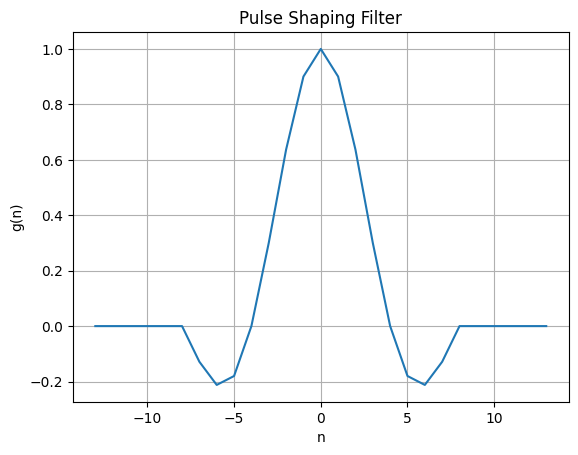

In [38]:
samp = np.arange(-L*J-5, L*J+6)
g_n = np.array([pulse_shaping_filter(i, J, beta, L) for i in samp])
plt.plot(samp, g_n)
plt.grid()
plt.xlabel("n")
plt.ylabel("g(n)")
plt.title("Pulse Shaping Filter")

In [39]:
def x_nTs(n, I_k, J, beta, L):
    '''
    calculates x(n.Ts) for n
    '''
    x_nTs = 0
    for k in range(len(I_k)):
        x_nTs += I_k[k]*pulse_shaping_filter(n-k, J, beta, L)

    return x_nTs

def get_sequence_x_nTs(I_k, J, beta, L, N=16):
    '''
    calculates sequence x(k.Ts) for k = 0, 1, ..., N*J-1
    '''
    x_kTs = np.zeros(N*J)
    for i in range(N*J):
        x_kTs[i] = x_nTs(i, I_k, J, beta, L)

    return x_kTs        


In [40]:
# 1.1
x_kTs = get_sequence_x_nTs(I_k, J, beta, L)
symbol_indices = np.where(I_k != 0)
# print(len(x_kTs)) = 64
# len(I_k) = 64

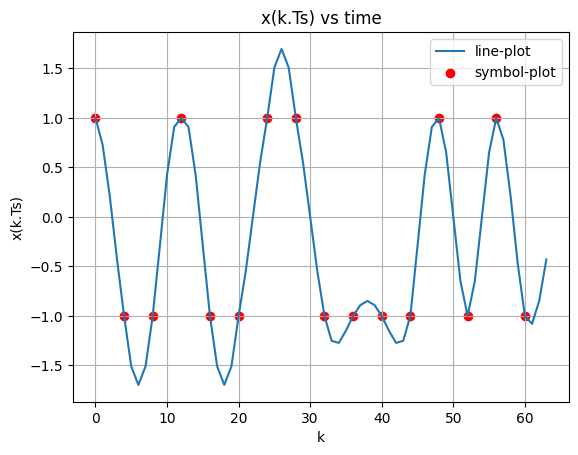

In [41]:
plt.plot(x_kTs, label = 'line-plot')
plt.scatter(symbol_indices, I_k[symbol_indices], c='r', label = 'symbol-plot')
plt.xlabel('k')
plt.ylabel('x(k.Ts)')
plt.legend()
plt.grid()
plt.title('x(k.Ts) vs time')
plt.show()

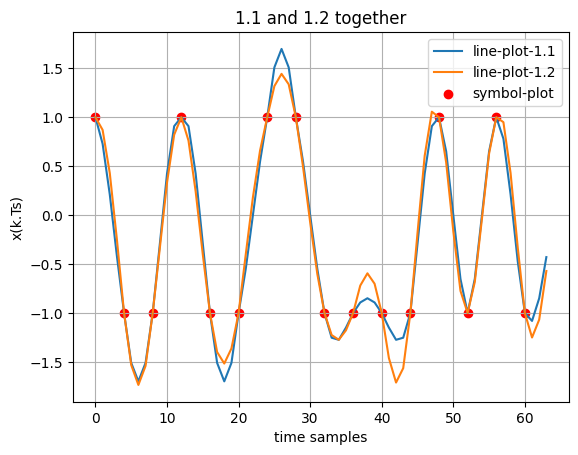

In [42]:
# 1.2 Repeat (a) L = 4
x_kTs_2 = get_sequence_x_nTs(I_k, J, beta, L=4)
plt.plot(x_kTs, label = 'line-plot-1.1')
plt.plot(x_kTs_2, label='line-plot-1.2')
plt.scatter(symbol_indices, I_k[symbol_indices], c='r', label = 'symbol-plot')
plt.xlabel('time samples')
plt.ylabel('x(k.Ts)')
plt.legend()
plt.grid()
plt.title('1.1 and 1.2 together')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_17340\3142027836.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  g_n = (np.sin(np.pi*n/J)/(np.pi*n/J))*((np.cos(np.pi*beta*n/J))/(1-((2*beta*n/J)**2)))


Text(0.5, 1.0, 'Pulse Shaping Filter for beta = 0.5')

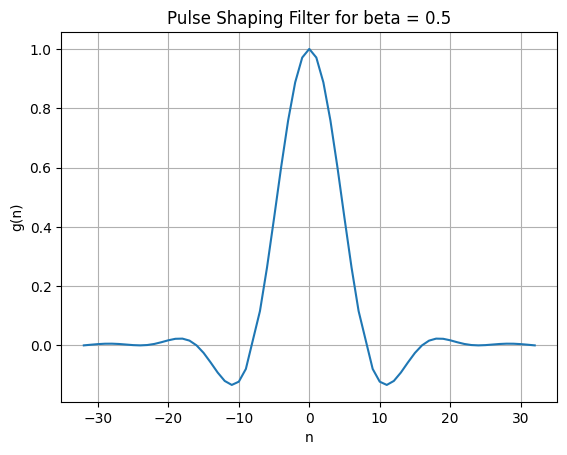

In [43]:
# 1.3 
# Three different plots of x(kTs) where all have
# J = 8, L = 4 with three bandwidth factors 0, 0.5, 1

samp_2 = np.arange(-4*8, 4*8+1)
g_n_2 = np.array([pulse_shaping_filter(i, 8, 0.5, 4) for i in samp_2])
plt.plot(samp_2, g_n_2)
plt.grid()
plt.xlabel("n")
plt.ylabel("g(n)")
plt.title("Pulse Shaping Filter for beta = 0.5")

C:\Users\USER\AppData\Local\Temp\ipykernel_17340\3142027836.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  g_n = (np.sin(np.pi*n/J)/(np.pi*n/J))*((np.cos(np.pi*beta*n/J))/(1-((2*beta*n/J)**2)))


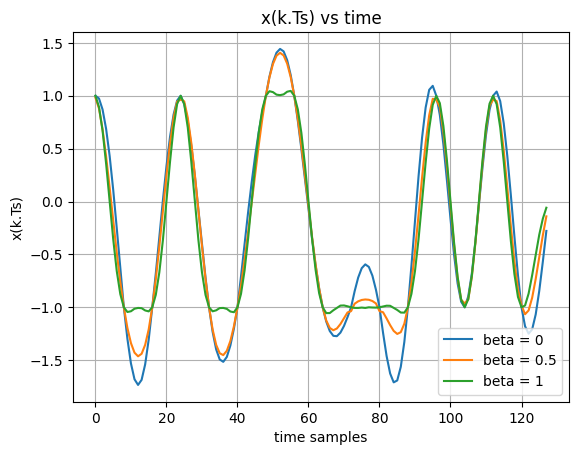

In [44]:
I_k_2 = interleave_zeros(I_data, J=8, N=16)
xkTs_a  = get_sequence_x_nTs(I_k_2, J=8, beta=0, L=4)
xkTs_b  = get_sequence_x_nTs(I_k_2, J=8, beta=0.5, L=4)
xkTs_c  = get_sequence_x_nTs(I_k_2, J=8, beta=1, L=4)

plt.plot(xkTs_a, label = 'beta = 0')
plt.plot(xkTs_b, label = 'beta = 0.5')
plt.plot(xkTs_c, label = 'beta = 1')
plt.xlabel('time samples')
plt.ylabel('x(k.Ts)')
plt.legend()
plt.grid()
plt.title('x(k.Ts) vs time')
plt.show()  

#### 1.4
Plotting PSD of Sx(f) using Periodogram
Monte-Carlo simulations and averaging to approximate the PSD of `x(kTs)`. For this Periodogram, we use R=100 runs, each of bit-sequence N=1024, for $\beta$=0.5, J=8, L=4. 
In each run, we get 1024*J samples. Then take an 8192-point FFT, square the magnitude response and average it point wise over the 100 trials. 
Divide this by R to get an estimate of the PSD. 

In [45]:
# 1.4
'''
Plotting PSD of Sx(f) using Periodogram
Monte-Carlo simulations and averaging to approximate the PSD of `x(kTs)`. For this Periodogram, we use R=100 runs, each of bit-sequence N=1024, for $\beta$=0.5, J=8, L=4. 
In each run, we get 1024*J samples. Then take an 8192-point FFT, square the magnitude response and average it point wise over the 100 trials. 
Divide this by R to get an estimate of the PSD. 
'''
J_mc = 8
L_mc = 4
beta_mc = 0.5
N_mc = 1024
R = 100

def get_periodogram(x_kTs, R):
    '''
    Calculates the periodogram of x(kTs)
    '''
    X_kTs = np.fft.fft(x_kTs, axis=1)
    X_kTs = np.abs(X_kTs)**2
    X_kTs = np.mean(X_kTs, axis=0)
    X_kTs /= R
    return X_kTs

In [46]:
# vectorized helper functions
def vec_pulse_shaping_filter(n, J, beta, L):
    g_n = np.zeros(n.shape)
    g_n[np.where(abs(n) > L*J)] = 0
    normal_ns = np.where(abs(n) <= L*J)
    g_n[normal_ns] = (np.sin(np.pi*n[normal_ns]/J)/(np.pi*n[normal_ns]/J))*((np.cos(np.pi*beta*n[normal_ns]/J))/(1-((2*beta*n[normal_ns]/J)**2)))
    g_n[np.where(n == 0)] = 1
    
    infs = np.where(g_n == np.inf)
    for i in infs:
        g_n[i] = (pulse_shaping_filter(n[i+1], J, beta, L) + pulse_shaping_filter(n[i-1], J, beta, L)) / 2

    return g_n

def vec_get_sequence_xkTs(I_k, J, beta, L, N):
    '''
    I_k is dimensions 100x8192
    '''
    x_kTs = np.array([np.convolve(I_k[i], vec_pulse_shaping_filter(np.arange(0, N*J), J, beta, L), 'same') for i in range(len(I_k))])
    return x_kTs

In [47]:
t = vec_pulse_shaping_filter(np.arange(0, 1024), 8, 0.5, 4)
print(t.shape)
print(t)

(1024,)
[1.         0.97094167 0.88723607 ... 0.         0.         0.        ]


C:\Users\USER\AppData\Local\Temp\ipykernel_17340\1500504812.py:6: RuntimeWarning: invalid value encountered in divide
  g_n[normal_ns] = (np.sin(np.pi*n[normal_ns]/J)/(np.pi*n[normal_ns]/J))*((np.cos(np.pi*beta*n[normal_ns]/J))/(1-((2*beta*n[normal_ns]/J)**2)))
C:\Users\USER\AppData\Local\Temp\ipykernel_17340\1500504812.py:6: RuntimeWarning: divide by zero encountered in divide
  g_n[normal_ns] = (np.sin(np.pi*n[normal_ns]/J)/(np.pi*n[normal_ns]/J))*((np.cos(np.pi*beta*n[normal_ns]/J))/(1-((2*beta*n[normal_ns]/J)**2)))


In [48]:
I_data_mc = [] 
for i in range(R):
    I_data_mc.append(generate_random(N_mc))

I_data_mc = np.array(I_data_mc)  # RxN = 100x1024

I_k_mc = []
for i in range(R):
    I_k_mc.append(interleave_zeros(I_data_mc[i], J_mc, N_mc))

I_k_mc = np.array(I_k_mc)  # RxN*J = 100x8192
# I_k_mc.shape = 100x8192

In [49]:
x_kTs_mc = vec_get_sequence_xkTs(I_k_mc, J_mc, beta_mc, L_mc, N_mc)
x_kTs_mc.shape

C:\Users\USER\AppData\Local\Temp\ipykernel_17340\1500504812.py:6: RuntimeWarning: invalid value encountered in divide
  g_n[normal_ns] = (np.sin(np.pi*n[normal_ns]/J)/(np.pi*n[normal_ns]/J))*((np.cos(np.pi*beta*n[normal_ns]/J))/(1-((2*beta*n[normal_ns]/J)**2)))
C:\Users\USER\AppData\Local\Temp\ipykernel_17340\1500504812.py:6: RuntimeWarning: divide by zero encountered in divide
  g_n[normal_ns] = (np.sin(np.pi*n[normal_ns]/J)/(np.pi*n[normal_ns]/J))*((np.cos(np.pi*beta*n[normal_ns]/J))/(1-((2*beta*n[normal_ns]/J)**2)))


(100, 8192)

In [50]:
s_xf = get_periodogram(x_kTs_mc, R)
s_xf.shape

(8192,)

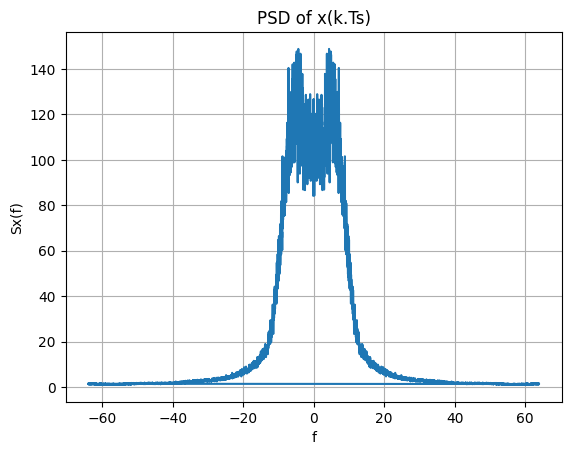

In [51]:
f = np.fft.fftfreq(N_mc*J_mc, 1/N_mc*J_mc)
plt.plot(f, s_xf)
plt.grid()
plt.xlabel('f')
plt.ylabel('Sx(f)')
plt.title('PSD of x(k.Ts)')
plt.show()

In [52]:
# when rectangular pulse shape is used

def vec_pulse_shaping_filter_rect(n, J):
    g_n = np.zeros(n.shape)
    normal_ns = np.where((n <= J) & (n >= 0))
    g_n[normal_ns] = 1/np.sqrt(J)
    
    return g_n

def vec_get_sequence_xkTs_rect(I_k, J, N):
    '''
    I_k is dimensions 100x8192
    '''
    x_kTs = np.array([np.convolve(I_k[i], vec_pulse_shaping_filter_rect(np.arange(0, N*J), J), 'same') for i in range(len(I_k))])
    return x_kTs

x_kTs_mc_rect = vec_get_sequence_xkTs_rect(I_k_mc, J_mc, N_mc)
x_kTs_mc_rect.shape

(100, 8192)

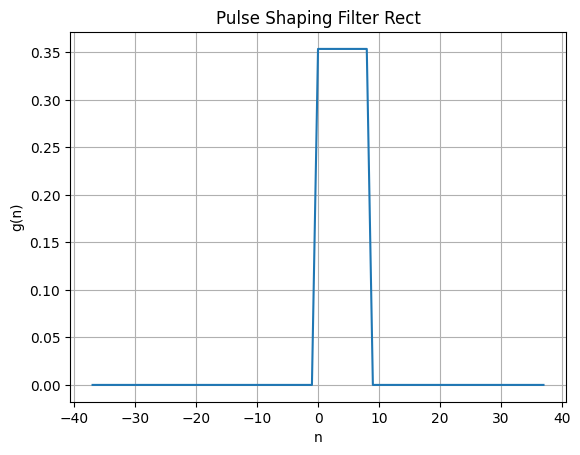

In [53]:
samp_mc = np.arange(-L_mc*J_mc-5, L_mc*J_mc+6)
g_n_mc = vec_pulse_shaping_filter_rect(samp_mc, J_mc)
plt.plot(samp_mc, g_n_mc)
plt.grid()
plt.xlabel("n")
plt.ylabel("g(n)")
plt.title("Pulse Shaping Filter Rect")
plt.show()


In [54]:
s_xf_rect = get_periodogram(x_kTs_mc_rect, R)
s_xf_rect.shape

(8192,)

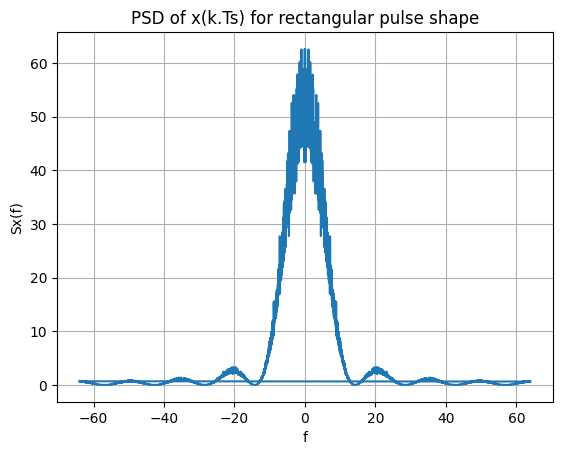

In [55]:
f = np.fft.fftfreq(N_mc*J_mc, 1/N_mc*J_mc)
plt.plot(f, s_xf_rect)
plt.grid()
plt.xlabel('f')
plt.ylabel('Sx(f)')
plt.title('PSD of x(k.Ts) for rectangular pulse shape')
plt.show()

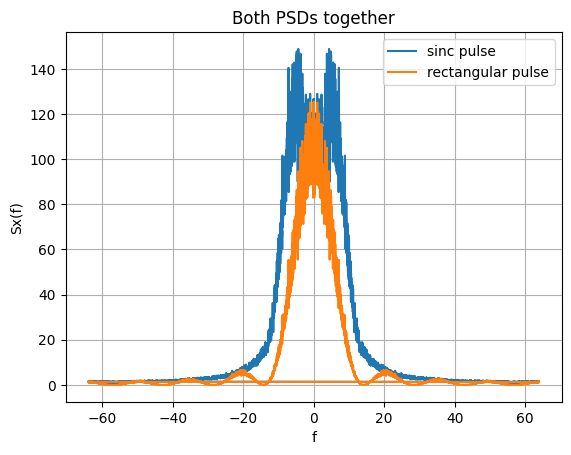

In [69]:
# plotting the two PSDs together
plt.plot(f, s_xf, label = 'sinc pulse')
plt.plot(f, s_xf_rect*2, label = 'rectangular pulse')
plt.grid()
plt.xlabel('f')
plt.ylabel('Sx(f)')
plt.title('Both PSDs together')
plt.legend()
plt.show()

#### Question 2
COmpare the theoretical average probability of symbol error $P_e$ and simulated symbol error rate $SER$. We'll also study the approximation of $P_E$ using bounds.

In [57]:
from math import erfc

In [58]:
# write all error functions
def get_Pe_2PAM(d, sigma):
    '''
    calculates the probability of error for 2-PAM
    '''
    q = np.array([0.5*erfc(d/(np.sqrt(2)*s)) for s in sigma])
    return q

def get_Pe_4QAM(d, sigma):
    '''
    calculates the probability of error for 4-QAM
    '''
    q = np.array([0.5*erfc(d/(np.sqrt(2)*s)) for s in sigma])
    pe = 1 - (1-q)**2
    return pe

def get_Pe_16QAM(d, sigma):
    '''
    calculates the probability of error for 16-QAM
    '''
    q = np.array([0.5*erfc(d/(np.sqrt(2)*s)) for s in sigma])
    pe = 1 - (4*((1-q)**2) + 8*(1-q)*(1-2*q) + 4*((1-2*q)**2)) / 16
    return pe

def get_noise(mean, sigma, N):
    '''
    N denotes dimension of noise
    N = 1 for PAM
    N = 2 for QAM 
    '''
    if N == 1:
        noise = np.random.normal(mean, sigma)
    elif N == 2:
        covariance = np.array([[sigma, 0], [0, sigma]])
        noise = np.random.multivariate_normal(mean, covariance)

    return noise

# define system variables
e_bit = 1
d_2pam = np.sqrt(e_bit)
d_4qam = np.sqrt(e_bit)
d_16qam = np.sqrt(e_bit*(2/5))

snr_range = np.arange(0, 16, 2)
sigma_range = np.sqrt(e_bit*(10**(-snr_range/10)))

Pe_2PAM = get_Pe_2PAM(d_2pam, sigma_range)
Pe_4QAM = get_Pe_4QAM(d_4qam, sigma_range)
Pe_16QAM = get_Pe_16QAM(d_16qam, sigma_range)

In [59]:
Pe_4QAM

array([2.92139018e-01, 1.97235317e-01, 1.09798884e-01, 4.54849493e-02,
       1.19727201e-02, 1.56478964e-03, 6.86040711e-05, 5.39029551e-07])

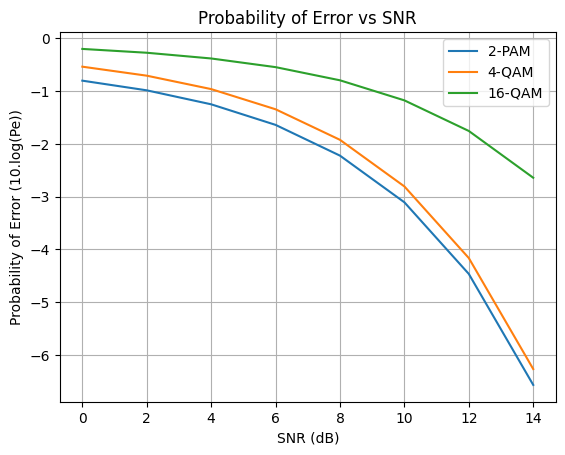

In [60]:
plt.plot(snr_range, np.log10(Pe_2PAM), label = '2-PAM')
plt.plot(snr_range, np.log10(Pe_4QAM), label = '4-QAM')
plt.plot(snr_range, np.log10(Pe_16QAM), label = '16-QAM')
plt.grid()
plt.xlabel('SNR (dB)')
plt.ylabel('Probability of Error (10.log(Pe))')
plt.title('Probability of Error vs SNR')
plt.legend()
plt.show()

In [61]:
# 2.1

def get_Pe_allpairwise(d, sigma):
    '''
    calculates the probability of error for all pairwise error
    '''
    q_d = np.array([0.5*erfc(d/(np.sqrt(2)*s)) for s in sigma])
    q_root2d = np.array([0.5*erfc((d*np.sqrt(2))/(np.sqrt(2)*s)) for s in sigma])
    pe = 2*q_d + q_root2d
    return pe

def get_Pe_4QAM_NN(d, sigma):
    '''
    calculates the probability of error for 4-QAM
    '''
    q = np.array([0.5*erfc(d/(np.sqrt(2)*s)) for s in sigma])
    pe = 2*q
    return pe

def get_Pe_4QAM_chernoff(d, sigma):
    '''
    calculates the probability of error for 4-QAM
    '''
    q = np.exp(- d**2 / (2 * (sigma**2)))
    pe = 1 - (1-q)**2
    return pe

Pe_221 = get_Pe_allpairwise(d_4qam, sigma_range)
Pe_222 = get_Pe_4QAM_NN(d_4qam, sigma_range)
Pe_223 = get_Pe_4QAM_chernoff(d_4qam, sigma_range)
Pe_224 = Pe_4QAM

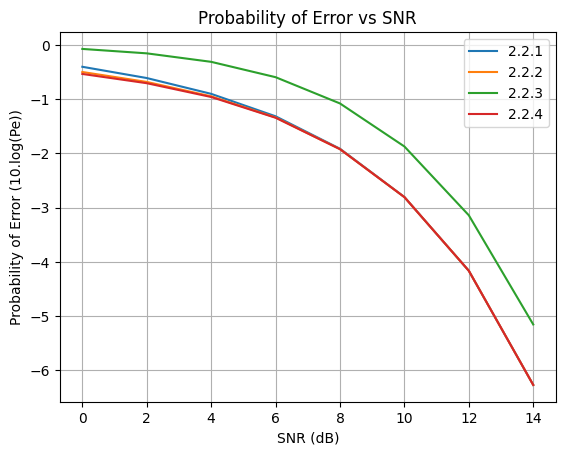

In [62]:
plt.plot(snr_range, np.log10(Pe_221), label = '2.2.1')
plt.plot(snr_range, np.log10(Pe_222), label = '2.2.2')
plt.plot(snr_range, np.log10(Pe_223), label = '2.2.3')
plt.plot(snr_range, np.log10(Pe_224), label = '2.2.4')
plt.grid()
plt.xlabel('SNR (dB)')
plt.ylabel('Probability of Error (10.log(Pe))')
plt.title('Probability of Error vs SNR')
plt.legend()
plt.show()

In [63]:
# 2.3
N_sim = 10000
I_k_real = np.random.choice([-d_4qam, d_4qam], size=(N_sim))
I_k_imag = np.random.choice([-d_4qam, d_4qam], size=(N_sim))
I_k = I_k_real + 1j*I_k_imag

def SER_simulator(I_k, sigma_range, N_simulations, type = '4QAM'):
    symbol_error_rates = []

    if type == '4QAM':
        for sigma in sigma_range:
            noise_real = np.random.normal(0, sigma, size=(N_simulations))
            noise_imag = np.random.normal(0, sigma, size=(N_simulations))
            noise = noise_real + 1j*noise_imag
            # print(noise.shape) = (100000,)
            # print(I_k.shape) = (100000,)
            r_k = I_k + noise # received signal
            # print(r_k.shape) = (100000,)

            # using the decision boundaries, get r_k to nearest symbol
            r_k_nearest_syms = np.zeros(len(r_k))*(0.0 + 0.0j)
            r_k_nearest_syms[np.where(r_k.real < 0)] = -d_4qam
            r_k_nearest_syms[np.where(r_k.real >= 0)] = d_4qam
            r_k_nearest_syms[np.where(r_k.imag < 0)] += -1j*d_4qam
            r_k_nearest_syms[np.where(r_k.imag >= 0)] += 1j*d_4qam
            
            # now find number of errored symbols
            error_indices = (np.where(r_k_nearest_syms != I_k))[0]
            error_count = len(error_indices)
            symbol_error_rate = error_count/N_simulations
            symbol_error_rates.append(symbol_error_rate)
        
    elif type == '16QAM':
        for sigma in sigma_range:
            noise_real = np.random.normal(0, sigma, size=(N_simulations))
            noise_imag = np.random.normal(0, sigma, size=(N_simulations))
            noise = noise_real + 1j*noise_imag
            # print(noise.shape) = (100000,)
            # print(I_k.shape) = (100000,)
            r_k = I_k + noise

            # using the decision boundaries, get r_k to nearest symbol
            r_k_nearest_syms = np.zeros(len(r_k))*(0.0 + 0.0j)
            r_k_nearest_syms[np.where(r_k.real < -2*d_16qam)] = -3*d_16qam
            r_k_nearest_syms[np.where((r_k.real >= -2*d_16qam) & (r_k.real < 0))] = -d_16qam
            r_k_nearest_syms[np.where((r_k.real >= 0) & (r_k.real < 2*d_16qam))] = d_16qam
            r_k_nearest_syms[np.where(r_k.real >= 2*d_16qam)] = 3*d_16qam
            r_k_nearest_syms[np.where(r_k.imag < -2*d_16qam)] += -3j*d_16qam
            r_k_nearest_syms[np.where((r_k.imag >= -2*d_16qam) & (r_k.imag < 0))] += -1j*d_16qam
            r_k_nearest_syms[np.where((r_k.imag >= 0) & (r_k.imag < 2*d_16qam))] += 1j*d_16qam
            r_k_nearest_syms[np.where(r_k.imag >= 2*d_16qam)] += 3j*d_16qam

            # now find number of errored symbols
            error_indices = np.where(r_k_nearest_syms != I_k)[0]
            error_count = len(error_indices)
            # print(error_count)
            symbol_error_rate = error_count/N_simulations
            symbol_error_rates.append(symbol_error_rate)

    return symbol_error_rates

In [64]:
SER_error_rates_4qam = SER_simulator(I_k, sigma_range, N_sim)

In [70]:
SER_error_rates_4qam

[0.2932, 0.1985, 0.1094, 0.0462, 0.0132, 0.0019, 0.0, 0.0]

C:\Users\USER\AppData\Local\Temp\ipykernel_17340\1688586883.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.plot(snr_range, np.log10(SER_error_rates_4qam), label = 'SER')


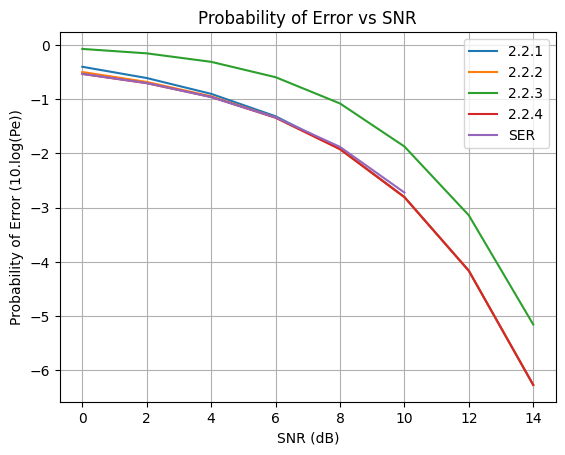

In [65]:
plt.plot(snr_range, np.log10(Pe_221), label = '2.2.1')
plt.plot(snr_range, np.log10(Pe_222), label = '2.2.2')
plt.plot(snr_range, np.log10(Pe_223), label = '2.2.3')
plt.plot(snr_range, np.log10(Pe_224), label = '2.2.4')
plt.plot(snr_range, np.log10(SER_error_rates_4qam), label = 'SER')
plt.grid()
plt.xlabel('SNR (dB)')
plt.ylabel('Probability of Error (10.log(Pe))')
plt.title('Probability of Error vs SNR')
plt.legend()
plt.show()

In [66]:
# 2.4
# Repeat part 2.3 for 16-QAM
I_k_real_16qam = np.random.choice([-3*d_16qam, -d_16qam, d_16qam, 3*d_16qam], size=(N_sim))
I_k_imag_16qam = np.random.choice([-3*d_16qam, -d_16qam, d_16qam, 3*d_16qam], size=(N_sim))
I_k_16qam = I_k_real_16qam + 1j*I_k_imag_16qam

SER_error_rates_16qam = SER_simulator(I_k_16qam, sigma_range, N_sim, type='16QAM')

In [67]:
# 2.5
# nearest neighbours bound for 16 QAM
def get_Pe_16QAM_NN(d, sigma):
    '''
    calculates the probability of error for 4-QAM
    '''
    q = np.array([0.5*erfc(d/(np.sqrt(2)*s)) for s in sigma])
    pe = 3*q
    return pe

Pe_16QAM_NN = get_Pe_16QAM_NN(d_16qam, sigma_range)

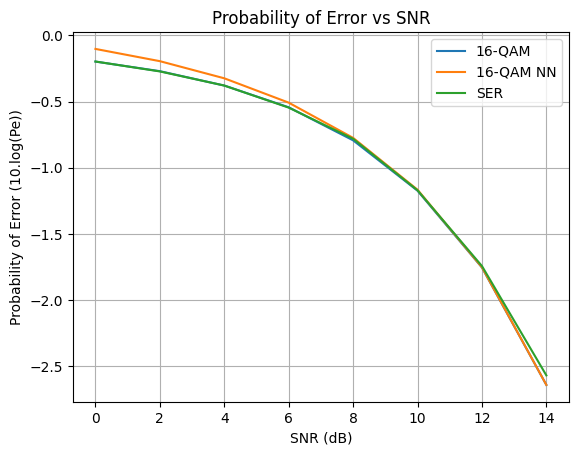

In [68]:
# plot this SER with the theoretical SER
plt.plot(snr_range, np.log10(Pe_16QAM), label = '16-QAM')
plt.plot(snr_range, np.log10(Pe_16QAM_NN), label = '16-QAM NN')
plt.plot(snr_range, np.log10(SER_error_rates_16qam), label = 'SER')
plt.grid()
plt.xlabel('SNR (dB)')
plt.ylabel('Probability of Error (10.log(Pe))')
plt.title('Probability of Error vs SNR')
plt.legend()
plt.show()